In [39]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# I. Wrangle

In [9]:
def wrangle(filepath):
    X = pd.read_csv(filepath, 
                    parse_dates=['week_start_date'], 
                    index_col='week_start_date')
    return X

In [17]:
X_train = wrangle('data/dengue_features_train.csv')
y_train = pd.read_csv('data/dengue_labels_train.csv')['total_cases']
X_test = wrangle('data/dengue_features_test.csv')

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1456 entries, 1990-04-30 to 2010-06-25
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   ndvi_ne                                1262 non-null   float64
 4   ndvi_nw                                1404 non-null   float64
 5   ndvi_se                                1434 non-null   float64
 6   ndvi_sw                                1434 non-null   float64
 7   precipitation_amt_mm                   1443 non-null   float64
 8   reanalysis_air_temp_k                  1446 non-null   float64
 9   reanalysis_avg_temp_k                  1446 non-null   float64
 10  reanalysis_dew_point_temp_k            1446 non-null  

In [29]:
X_train['city'].value_counts()

sj    936
iq    520
Name: city, dtype: int64

# II. Split the Data

In [19]:
# We don't need to do any splitting here

# III. Baseline

This is a *regresion* problem.

In [26]:
print('Target mean:', y_train.mean())
y_pred = [y_train.mean()] * len(y_train)
print('Baseline MAE:', mean_absolute_error(y_train, y_pred))

Target mean: 24.67513736263736
Baseline MAE: 23.003354818258664


# IV. Build Model

In [33]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(random_state=42)
)

model.fit(X_train, y_train);

/Users/nicholascifuentes-goodbody/.local/share/virtualenvs/DS23-dengai-R3WthDLP/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


# V. Check Metrics

In [34]:
print('Training MAE:', mean_absolute_error(y_train, model.predict(X_train)))

Training MAE: 4.532184065934066


# VI. Communicate Results

In [37]:
importances = model.named_steps['randomforestregressor'].feature_importances_
features = model.named_steps['onehotencoder'].get_feature_names()

<AxesSubplot:>

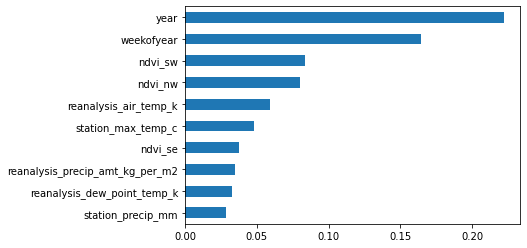

In [40]:
pd.Series(importances, index=features).sort_values().tail(10).plot(kind='barh')

# VII. Make Submission

In [41]:
y_pred = model.predict(X_test)

In [45]:
submission = X_test[['city','year','weekofyear']]
submission['total_cases'] = y_pred
submission.head()

<ipython-input-45-19fc22a20296>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['total_cases'] = y_pred


,city,year,weekofyear,total_cases
week_start_date,,,,
2008-04-29,sj,2008,18,4.81
2008-05-06,sj,2008,19,5.04
2008-05-13,sj,2008,20,5.41
2008-05-20,sj,2008,21,8.30
2008-05-27,sj,2008,22,9.00
